# Parte 1

Crea una función a la que se le pase como input: 
- la media en el eje x 
- la media en el eje y 
- la varianza en el eje x
- la varianza en el eje y 
- la covarianza de x e y
- el número de puntos N a generar

y devuelva una matriz con N filas y 2 columnas con los números que salen de la distribución gaussiana de dos dimensiones definidas por los valores de input. 

(usar la función MASS::mvrnorm)

In [1]:
library(MASS)

my.gauss.2D <- function(mean.x, mean.y, var.x, var.y, cov.xy, N){
    my.cov = matrix(nrow = 2, ncol = 2)
    my.cov[1,1] <- var.x
    my.cov[2,2] <- var.y
    my.cov[1,2] <- cov.xy
    my.cov[2,1] <- cov.xy
    my.output <- as.data.frame(mvrnorm(n = N, mu = c(mean.x, mean.y), Sigma = my.cov))
    names(my.output)[1] <- "x1"
    names(my.output)[2] <- "x2"
    return(my.output)
}

#my.gauss.2D(2,4,1,1,0.3,10)

# Parte 2

Genera una matrix 'x1' usando la función anterior y tomando: 
- N = 1000 
- mu_x = 2
- mu_y = 4
- var_x = var_y = 1
- Cov(x,y) = 0.3. 

Crea una matriz 'y1' con tantas filas como la matriz 'x1' y asígnale el valor 0. 

In [2]:
# Defino los parametros
N <- 1000
mu.x <- 2
mu.y <- 4
sigma.x <- 1
sigma.y <- 1
covariance <- 0.3

x1 <- my.gauss.2D(mu.x,mu.y,sigma.x,sigma.y,covariance,N)
y1 <- matrix(rep(0,length(x1$x1)), ncol = 1)

# Parte 3

Repite (2) para otra muestra con: 
- N = 1000 
- mu_x = 6 
- mu_y = 3
- var_x = var_y = 1
- Cov(x,y) = 0.3. 

Crea una matriz 'y2' con tantas filas como la matriz x2 y asígnale el valor 1.

In [3]:
# Defino los parametros
N <- 1000
mu.x <- 6
mu.y <- 3
sigma.x <- 1
sigma.y <- 1
covariance <- 0.3

x2 <- my.gauss.2D(mu.x,mu.y,sigma.x,sigma.y,covariance,N)
y2 <- matrix(rep(1,length(x1$x1)), ncol = 1)

# Parte 4

Junta las matrices x1, x2, y y1, y2 en una sola matriz 'x' y una sola matriz 'y'.

In [4]:
my.mat.x <- rbind(x1,x2)

In [5]:
my.mat.y <- rbind(y1,y2)

# Parte 5

Usando las funciones de coste y gradiente de la practica 4, utiliza *optim* para un modelo en el que

$z = \alpha_0 + \alpha_1 \times x1 + \alpha_2 \times x2$ 

tomando como vector de parámetros inicial $\vec{\alpha} =  (0, 0, 0)$. 

Calcula y pinta la frontera entre ambas distribuciones. 

In [6]:
# Sigmoid function

my.sigmoid <- function(z){
    sigm <- 1. / (1 + exp(-z))   
    return(sigm)
}

In [7]:
# Loss function

my.loss <- function(alpha, mat.x, mat.y){
    ones <- matrix(rep(1,nrow(mat.x)), ncol = 1)
    mat.features <- cbind(ones, mat.x)
    # only the y
    sigm <- as.vector(my.sigmoid(alpha %*% t(mat.features)))
    mat.y <- as.vector(mat.y)
    loss <- mat.y * log(sigm) + (1 - mat.y) * log(1 - sigm)
    return(- sum(loss) / nrow(mat.x))
}
my.loss(c(0,1,0),my.mat.x, my.mat.y)

[1] 1.086751

In [8]:
# Gradient

my.grad <- function(alpha, mat.x, mat.y){
    ones <- matrix(rep(1,nrow(mat.x)), ncol = 1)
    # do not consider the y
    # mat.x.only <- mat.x[,-ncol(mat.x)]
    mat.features <- cbind(ones, mat.x)
    # only the y
    sigm <- as.vector(my.sigmoid(alpha %*% t(mat.features)))
    grad <- (sigm - mat.y) * mat.features
    print(colSums(grad))
    return(colSums(grad) / nrow(mat.x))
}
#my.grad(c(0,0,0), my.mat.x, my.mat.y)


In [35]:
# Actual minimization

initial_alpha <- c(0,0,0)
qq <- optim(par = initial_alpha, fn = my.loss, gr = my.grad, mat.x = my.mat.x, mat.y = my.mat.y, method = "BFGS")
qq

      ones         x1         x2 
    0,0000 -2005,1183   477,4105 
     ones        x1        x2 
 292,1702 -377,6203 1412,1363 
      ones         x1         x2 
 -87,78501 -725,85066 -345,59480 
      ones         x1         x2 
 -43,44197 -455,14839 -194,31195 
       ones          x1          x2 
   4,657926 -150,708787  -26,336427 
     ones        x1        x2 
 20,21587 -39,01139  29,90286 
    ones       x1       x2 
26,50780 20,23142 54,31562 
    ones       x1       x2 
27,22972 43,73432 59,00206 
     ones        x1        x2 
18,155117  7,720522 25,321152 
      ones         x1         x2 
 12,570154 -14,727362   4,619265 
       ones          x1          x2 
 11,1003640 -20,3190595  -0,7206452 
      ones         x1         x2 
  4,160001 -44,919370 -25,314769 
      ones         x1         x2 
 -1,791283 -62,518041 -45,174906 
      ones         x1         x2 
 -5,933415 -67,383716 -56,249176 
      ones         x1         x2 
 -5,437317 -53,861101 -49,812042 
       one

$par
[1] -8,640243  4,672104 -2,836034

$value
[1] 0,03096849

$counts
function gradient 
      76       73 

$convergence
[1] 0

$message
NULL

In [10]:
qq$par

# z = qq$par[1] + (x1 * qq$par[2]) + (x2 * qq$par[3])

# si no quiero introducir bias, z = 0:
a <- qq$par[1] / qq$par[3]
b <- qq$par[2] / qq$par[3]

[1] -8.640243  4.672104 -2.836034

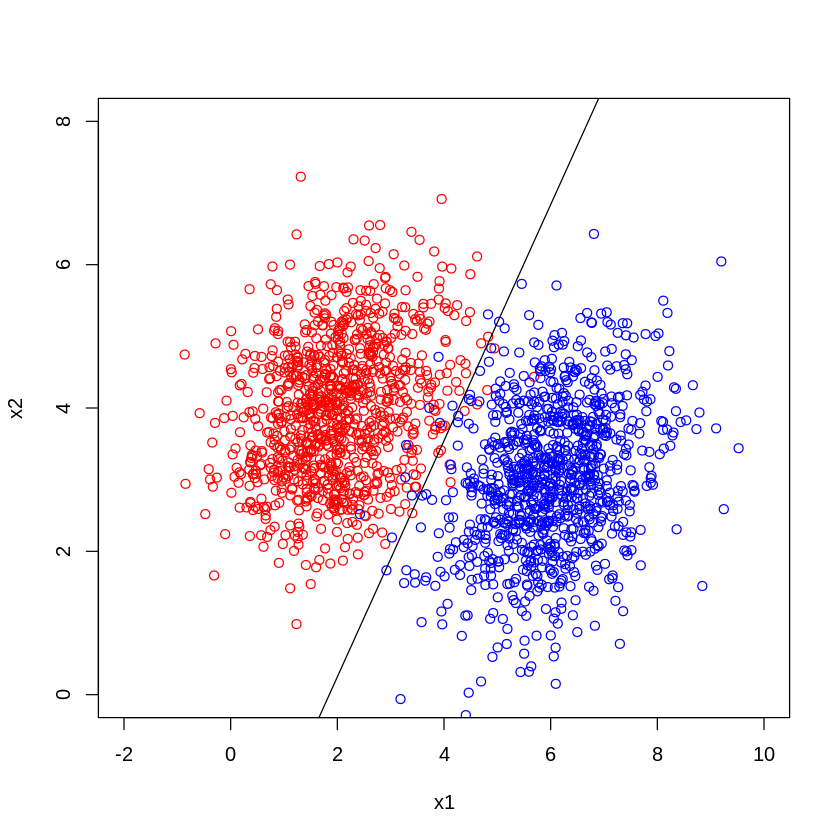

In [11]:
#plot(my.mat.x, my.mat.y)

plot(my.mat.x[1:1000,], col = "red", xlim = c(-2,10), ylim = c(0,8))
points(my.mat.x[1001:2000,], col = "blue")
abline(-a,-b)

# Parte 6

Repite otra vez 1, 2, 3 y 4 para obtener otras matrices x e y independientes. 

Utilizando la “sigma” calculada anteriormente calcula el TPR, TNR, FPR y FNR para valores del threshold = 0.3, 0.5, 0.7.  

In [14]:
# Defino los parametros
N <- 1000
mu.x <- 2
mu.y <- 4
sigma.x <- 1
sigma.y <- 1
covariance <- 0.3

new.x1 <- my.gauss.2D(mu.x,mu.y,sigma.x,sigma.y,covariance,N)
new.y1 <- matrix(rep(0,length(x1$x1)), ncol = 1)

In [15]:
# Defino los parametros
N <- 1000
mu.x <- 6
mu.y <- 3
sigma.x <- 1
sigma.y <- 1
covariance <- 0.3

new.x2 <- my.gauss.2D(mu.x,mu.y,sigma.x,sigma.y,covariance,N)
new.y2 <- matrix(rep(1,length(x1$x1)), ncol = 1)

In [16]:
new.mat.x <- rbind(new.x1,new.x2)
new.mat.y <- rbind(new.y1,new.y2)

In [ ]:
# recordamos:
# z = qq$par[1] + (x1 * qq$par[2]) + (x2 * qq$par[3])

get.ab.line <- function(parameters, threshold){
    my.a <- (parameters$par[1] - threshold) / parameters$par[3]
    my.b <- (parameters$par[2] - threshold) / parameters$par[3]    
    return(c(my.a,my.b))
}

In [25]:
line.00 <- get.ab.line(qq, 0.0)
line.03 <- get.ab.line(qq, 0.3)
line.05 <- get.ab.line(qq, 0.5)
line.07 <- get.ab.line(qq, 0.7)

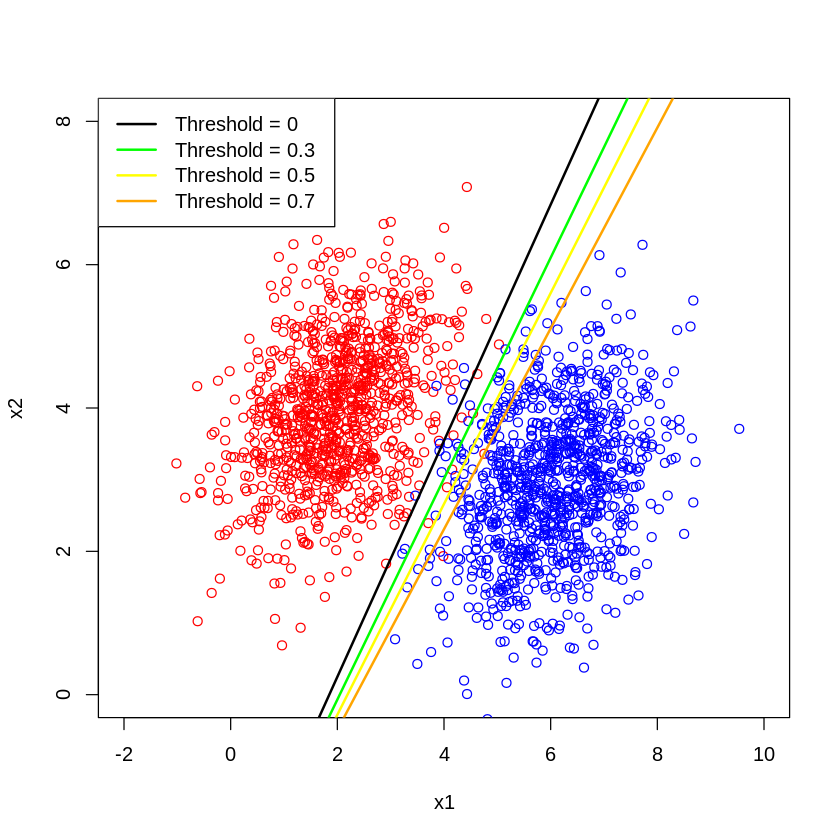

In [34]:
# Red --> y = 0
plot(new.mat.x[1:1000,], col = "red", xlim = c(-2,10), ylim = c(0,8))

# Blue --> y = 1
points(new.mat.x[1001:2000,], col = "blue")

abline(-line.00, lwd = 2)
abline(-line.03, col = "green", lwd = 2)
abline(-line.05, col = "yellow", lwd = 2)
abline(-line.07, col = "orange", lwd = 2)

legend("topleft", legend=c("Threshold = 0", "Threshold = 0.3", "Threshold = 0.5", "Threshold = 0.7"),
       col=c("black", "green", "yellow", "orange"), lwd = c(2,2,2,2), lty=c(1,1,1,1), cex=1)

In [48]:
my.confusion.matrix <- function(line.parameters, mat.x, vec.y){
    confusion.matrix = matrix(c(0,0,0,0), ncol = 2, nrow = 2)
    
    # Initialize the 4 entries of the matrix
    
    # True positive (1,1)
    TP = 0
    # True negative (0,0)
    TN = 0
    # False positive (1,0)
    FP = 0
    # False negative (0,1)
    FN = 0
    
    # for each point, if it is below the line assign exp.y = 1, otherwise exp.y = 0
    for (i in 1:nrow(mat.x)){
        if (mat.x[i,2] < -line.parameters[1] - mat.x[i,1] * line.parameters[2])
            exp.y <- 1
        else exp.y <- 0
        # compare exp.y with vec.y and assign to the correct category
        if (exp.y == 1 & vec.y[i] == 1) TP = TP + 1
        else if (exp.y == 0 & vec.y[i] == 0) TN = TN + 1
        else if (exp.y == 1 & vec.y[i] == 0) FP = FP + 1
        else if (exp.y == 0 & vec.y[i] == 1) FN = FN + 1
    }
    confusion.matrix[1,1] = TP
    confusion.matrix[2,2] = TN
    confusion.matrix[1,2] = FP
    confusion.matrix[2,1] = FN    

    # Put labels on the matrix
    rownames(confusion.matrix) <- c("Classified as positive", "Classified as negative")
    colnames(confusion.matrix) <- c("Actually positive", "Actually negative")
    return(confusion.matrix)
}

In [47]:
print("Confusion matrix setting threshold at 0")
my.confusion.matrix(line.00, new.mat.x, new.mat.y)

[1] "Confusion matrix setting threshold at 0"


,Actually positive,Actually negative
Classified as positive,993,10
Classified as negative,7,990


In [52]:
print("Confusion matrix setting threshold at 0.3")
my.confusion.matrix(line.03, new.mat.x, new.mat.y)

[1] "Confusion matrix setting threshold at 0.3"


,Actually positive,Actually negative
Classified as positive,983,5
Classified as negative,17,995


In [50]:
print("Confusion matrix setting threshold at 0.5")
my.confusion.matrix(line.05, new.mat.x, new.mat.y)

[1] "Confusion matrix setting threshold at 0.5"


,Actually positive,Actually negative
Classified as positive,967,2
Classified as negative,33,998


In [51]:
print("Confusion matrix setting threshold at 0.7")
my.confusion.matrix(line.07, new.mat.x, new.mat.y)

[1] "Confusion matrix setting threshold at 0.7"


,Actually positive,Actually negative
Classified as positive,928,2
Classified as negative,72,998
